In [1]:
%load_ext rpy2.ipython
import numpy as np
import pandas as pd

In [3]:
%%R 
library(ggplot2)

In [4]:
import imp
logistic_regression = imp.load_source('logistic_regression', '../lib/logistic_regression.py')
from logistic_regression import *

In [5]:
from sklearn import datasets

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
x, y = datasets.make_classification(100, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1)

In [8]:
data = pd.DataFrame({'x': np.array(x).flatten(), 'y': y})

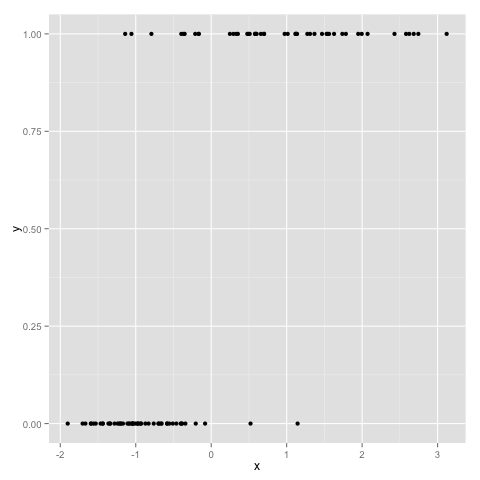

In [9]:
%%R -i data

ggplot(data=data, aes(x=x, y=y)) +
    geom_point()

# Batch gradient logistic regression

In [10]:
binomial = Binomial()
binomial.fit(x, y)
data = pd.DataFrame({'x': np.array(x).flatten(), 'y': y, 'p': binomial.predict(x).astype(str)})

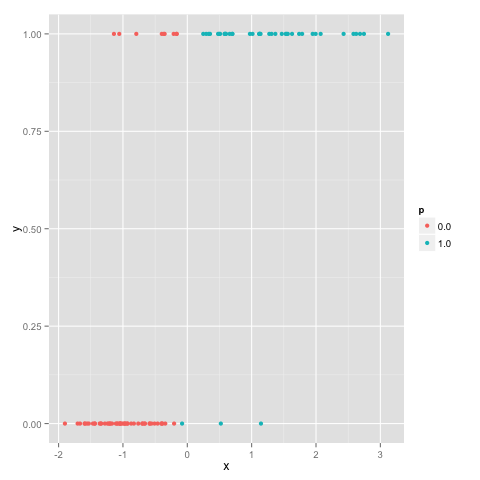

In [11]:
%%R -i data

ggplot(data=data, aes(x=x, y=y, color=p)) +
    geom_point()

# ScikitLearn logistic regression

In [12]:
binomial = LogisticRegression()
binomial.fit(x, y)
data = pd.DataFrame({'x': np.array(x).flatten(), 'y': y, 'p': binomial.predict(x).astype(str)})

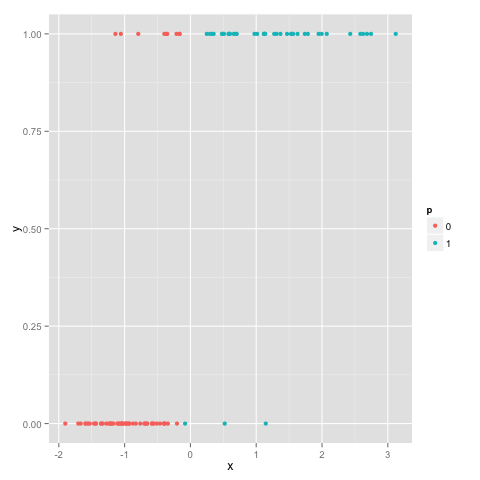

In [13]:
%%R -i data

ggplot(data=data, aes(x=x, y=y, color=p)) +
    geom_point()

# Multinomial one-vs-all

In [14]:
data = pd.read_csv('iris.data.txt', names = ['slength', 'swidth', 'plength', 'pwidth', 'type'])

In [15]:
data['y'] = pd.Categorical.from_array(data.type).codes

In [16]:
x = data[['slength', 'swidth', 'plength', 'pwidth']].values
y = data['y'].values

In [17]:
m = Multinomial()
m.fit(x, y)

In [18]:
np.sum(m.predict(x) == y) / len(y)

0.7533333333333333

In [19]:
data['y_pred'] = m.predict(x)

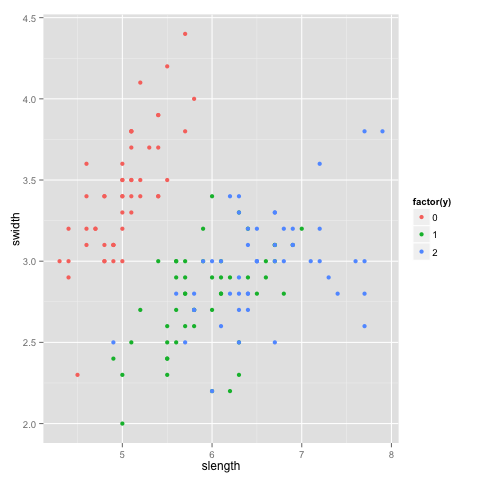

In [20]:
%%R -i data

ggplot(data=data, aes(x=slength, y=swidth, color=factor(y))) +
    geom_point()

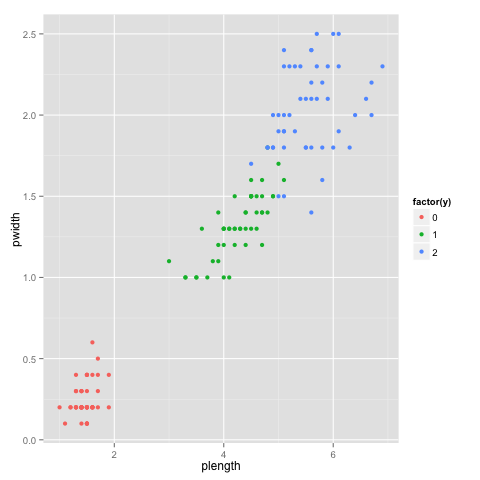

In [21]:
%%R -i data

ggplot(data=data, aes(x=plength, y=pwidth, color=factor(y))) +
    geom_point()

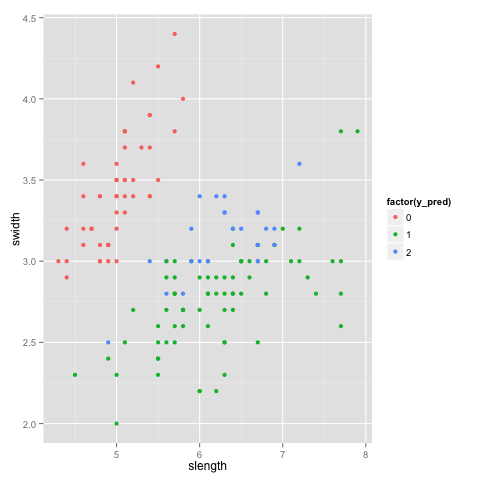

In [22]:
%%R -i data

ggplot(data=data, aes(x=slength, y=swidth, color=factor(y_pred))) +
    geom_point()

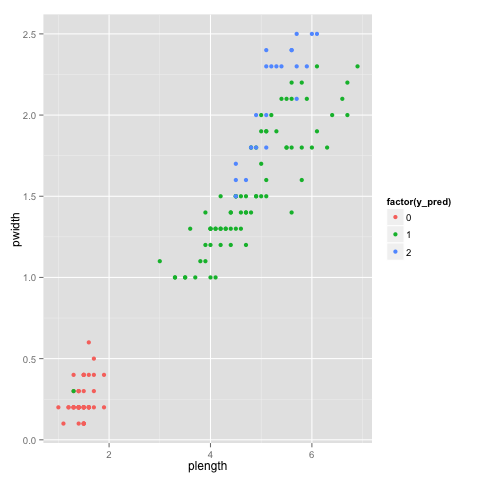

In [23]:
%%R -i data

ggplot(data=data, aes(x=plength, y=pwidth, color=factor(y_pred))) +
    geom_point()